In [151]:
# Importing packages - Pandas, Numpy, Seaborn
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sys


In [152]:
# Reading the data as dataframe and print the first five rows
game = pd.read_csv('DS+-+Part2+-+Basketball.csv')

In [153]:
# cleaning the data 
game['Team'] = game.Team.str.extract('(\d+)')
game = game.replace('-',0)

#Preparing new feature
#---------------------
# FirstSession , LastSession played till now
game[['FirstSession','LastSession']] = game.TeamLaunch.str.extractall(r'(\d+)')[0].unstack()
game = game.fillna(0)

game['FirstSession']= game['FirstSession'].astype(str).astype(int)
game['LastSession'] = game['LastSession'].astype(str).astype(int)

game['LastSession'] = game['FirstSession']-game['FirstSession']%100 + game['LastSession']
game['LastSession'].values[42] = 2000
game.drop(['TeamLaunch'], axis = 1)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld,FirstSession,LastSession
0,1,86,4385,2762,1647,552,563,5947,3140,33,23,1,1929,1900
1,2,86,4262,2762,1581,573,608,5900,3114,25,25,1,1929,1900
2,3,80,3442,2614,1241,598,775,4534,3309,10,8,1,1929,1900
3,4,82,3386,2664,1187,616,861,4398,3469,6,6,1,1931,1932
4,5,86,3368,2762,1209,633,920,4631,3700,8,7,1,1929,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,1,34,38,8,10,20,38,66,0,0,20,2009,2010
57,58,1,22,30,7,8,15,37,57,0,0,16,1956,1957
58,59,1,19,30,7,5,18,51,85,0,0,16,1951,1952
59,60,1,14,30,5,4,21,34,65,0,0,15,1955,1956


In [155]:
game.describe().T

,count,mean,std,min,25%,50%,75%,max
Tournament,61.0,24.000000,26.827225,1.0,4.0,12.0,38.0,86.0
HighestPositionHeld,61.0,7.081967,5.276663,1.0,3.0,6.0,10.0,20.0
FirstSession,61.0,1958.918033,27.484114,1929.0,1935.0,1951.0,1978.0,2017.0
LastSession,61.0,1955.000000,34.350643,1900.0,1936.0,1952.0,1979.0,2018.0


# EDA

In [156]:
game.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,FirstSession,LastSession
0,1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1929,1900
1,2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,1929,1900
2,3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,1929,1900
3,4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1,1931,1932
4,5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,1929,1900


In [157]:
game.dtypes

Team                   object
Tournament              int64
Score                  object
PlayedGames            object
WonGames               object
DrawnGames             object
LostGames              object
BasketScored           object
BasketGiven            object
TournamentChampion     object
Runner-up              object
TeamLaunch             object
HighestPositionHeld     int64
FirstSession            int32
LastSession             int32
dtype: object

In [159]:
game.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
FirstSession           0
LastSession            0
dtype: int64

C:\Users\dell\anaconda3\envs\kernel_torch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BasketScored', ylabel='Density'>

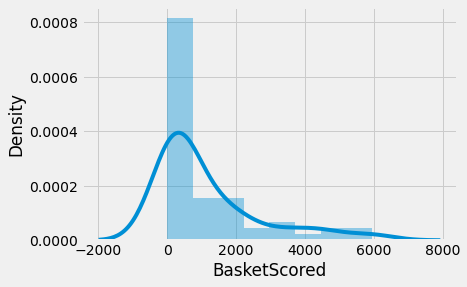

In [165]:
sns.distplot(game['BasketScored'])